# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [2]:
import glob 

In [5]:
doc2text = dict()

for filepath in glob.glob("DocCol2/*"):
    filename = filepath.split("/")[-1] # 
    with open(filepath) as f:
        doc2text[filename] = f.read()

doc2text[filename][:100]

'From: muirm@argon.gas.organpipe.uug.arizona.edu (maxwell c muir)\nSubject: Re: Why do people become a'

### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [6]:
import nltk


In [8]:
fulltext = "".join(doc2text.values())

In [10]:
words = nltk.word_tokenize(fulltext)

In [12]:
import string

### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [23]:
tokens = list()
for word in words:
    if len(word) == 1:
        continue
    if any(not c.isalpha() for c in word):
        continue
    tokens.append(word.lower())
tokens[:5]

['from', 'nathanp', 'nathan', 'subject', 're']

In [24]:
len(tokens)

89050

### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [25]:
from nltk.corpus import stopwords


In [26]:
stopwords_en = set(stopwords.words("english"))
len(stopwords_en)

179

In [27]:
tokens = [token for token in tokens if token not in stopwords_en]

In [28]:
len(tokens)

47075

### Exercício 5) 
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [29]:
from nltk.stem import PorterStemmer


In [30]:
stemmer = PorterStemmer()

In [31]:
tokens = [stemmer.stem(token) for token in tokens]

In [34]:
len(tokens)

47075

In [35]:
tokens = set(tokens)

In [37]:
len(tokens)

6762

### Exercício 6) 
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

In [40]:
stopwords_en = set(stopwords.words("english"))
stemmer = PorterStemmer()

In [41]:
doc2tokens = dict()

for doc, text in doc2text.items():
    words = nltk.word_tokenize(text)
    tokens = list()
    for word in words:
        if len(word) == 1:
            continue
        if any(not c.isalpha() for c in word):
            continue
        tokens.append(word.lower())
    tokens = [token for token in tokens if token not in stopwords_en]
    tokens = [stemmer.stem(token) for token in tokens]
    doc2tokens[doc] = tokens

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [ ]:
words = set()
for tokens in doc2tokens.values():
     for token in tokens:
        words.add(token)
words = list(words)

In [50]:
my_set = {"a", "b", "a"}
my_set

{'a', 'b'}

In [51]:
documents = list(doc2tokens.keys())
words = list(set(token for tokens in doc2tokens.values() for token in tokens))

In [57]:
data_ini = np.zeros((len(documents), len(words)), dtype=int)

In [59]:
df_bow = pd.DataFrame(data=data_ini, index=documents, columns=words)

In [72]:
for doc, tokens in doc2tokens.items():
    token2count = dict(Counter(tokens))
    doc_tokens = list(token2count.keys())
    doc_counts = [token2count[token] for token in doc_tokens]
    df_bow.loc[doc, doc_tokens] = doc_counts

### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
)


In [79]:
X = df_bow.values

In [80]:
scaler = StandardScaler()

In [82]:
scaler = scaler.fit(X)

In [83]:
X_scaled = scaler.transform(X)

In [85]:
pca = PCA(n_components=2)

In [87]:
pca = pca.fit(X_scaled)

In [88]:
X_pca = pca.transform(X_scaled)

In [92]:
X_pca.shape

(91, 2)

### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline


In [101]:
labels_str = df_bow.index.str[:2]
le = LabelEncoder()
le.fit(labels_str)
labels = le.transform(labels_str)
labels

array([0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       1, 2, 1])

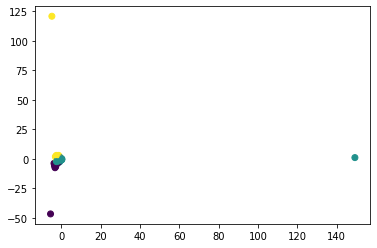

In [103]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

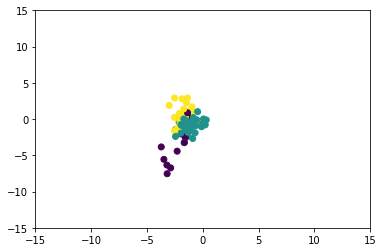

In [104]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.show()

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele. 

In [108]:
ix_t = df_bow.index.get_loc("au8")
ix_t

0

In [110]:
def vec_cos(vec_a, vec_b):
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return vec_a @ vec_b / (norm_a * norm_b)

In [113]:
vec_t = X[ix_t]

max_cos = -np.inf
ix_best = -1
for i in range(X.shape[0]):
    if i == ix_t:
        continue
    vec_i = X[i]
    cos_i = vec_cos(vec_t, vec_i)
    if cos_i > max_cos:
        max_cos = cos_i
        ix_best = i

In [115]:
ix_best, df_bow.index[ix_best]

(40, 'au7')

In [118]:
a = list(df_bow.index)

In [119]:
for i, doc in enumerate(a):
    print(i, doc)

0 au8
1 gr10
2 ch4
3 ch36
4 au6
5 ch44
6 ch27
7 ch1
8 ch22
9 ch40
10 gr6
11 ch13
12 gr3
13 ch46
14 gr5
15 ch19
16 ch43
17 gr11
18 ch3
19 ch2
20 ch5
21 gr1
22 au11
23 ch7
24 ch48
25 au12
26 au9
27 ch26
28 au14
29 gr9
30 gr22
31 gr23
32 ch23
33 ch8
34 au2
35 ch9
36 gr16
37 gr17
38 gr12
39 ch15
40 au7
41 gr13
42 ch31
43 ch25
44 ch24
45 gr21
46 ch33
47 au1
48 gr2
49 gr26
50 au15
51 ch16
52 au13
53 ch41
54 ch28
55 ch12
56 au10
57 au3
58 gr19
59 ch18
60 ch50
61 gr24
62 gr15
63 gr7
64 gr25
65 ch20
66 ch17
67 gr18
68 gr8
69 ch30
70 ch37
71 ch6
72 ch47
73 ch45
74 ch42
75 au4
76 ch32
77 ch21
78 ch49
79 ch29
80 gr4
81 ch38
82 gr20
83 au5
84 ch34
85 ch10
86 ch11
87 ch14
88 ch35
89 gr14
90 ch39
